DBSCAN - CLUSTERING METHOD

Number of clusters: 274
No noise points found.


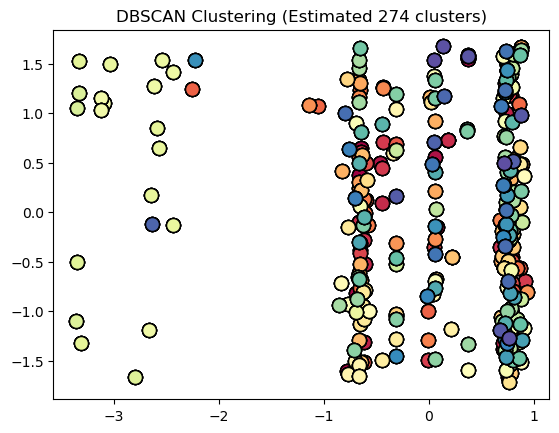

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_excel('Databook.xlsx')

selected_features = ['INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION','REV_AT_EPOCH','BSTAR','MEAN_MOTION_DOT']
newdf=df[selected_features]
data = df[selected_features].values

scaler = StandardScaler()
data = scaler.fit_transform(data)

epsilon = 0.4 # Epsilon (maximum distance to be considered a neighbor)
min_samples = 8  # Minimum number of samples in a cluster

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(data)

# Extracting cluster assignments and noise points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels) - set([-1]))  # -1 is the label for noise points

print(f'Number of clusters: {n_clusters_}')

noise_points = data[labels == -1]

if len(noise_points) > 0:
    print("Noise Points:")
    for idx, point in enumerate(noise_points):
        print(f'Point {idx}: {point}')
else:
    print("No noise points found.")

# Plotting
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=20)

plt.title(f'DBSCAN Clustering (Estimated {n_clusters_} clusters)')
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(data, labels)

In [ ]:
ch_score

17476.453210225663

In [ ]:
import joblib

model_file='DBSCAN_MODEL.pkl'
joblib.dump(dbscan,model_file)
print(f"DBSCAN model saved in {model_file} file")

DBSCAN model saved in DBSCAN_MODEL.pkl file


DATA EXPLORATION - PAIR PLOTS

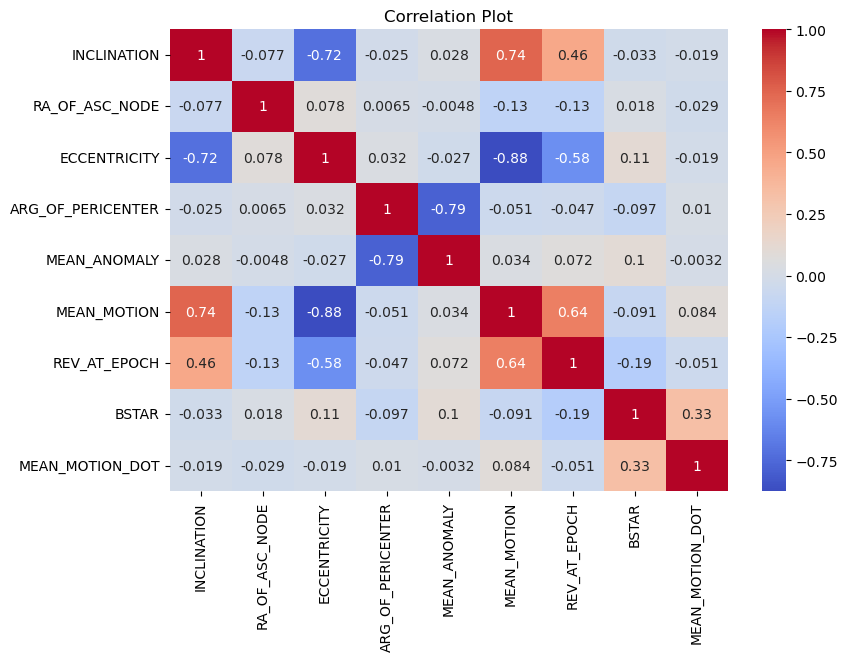

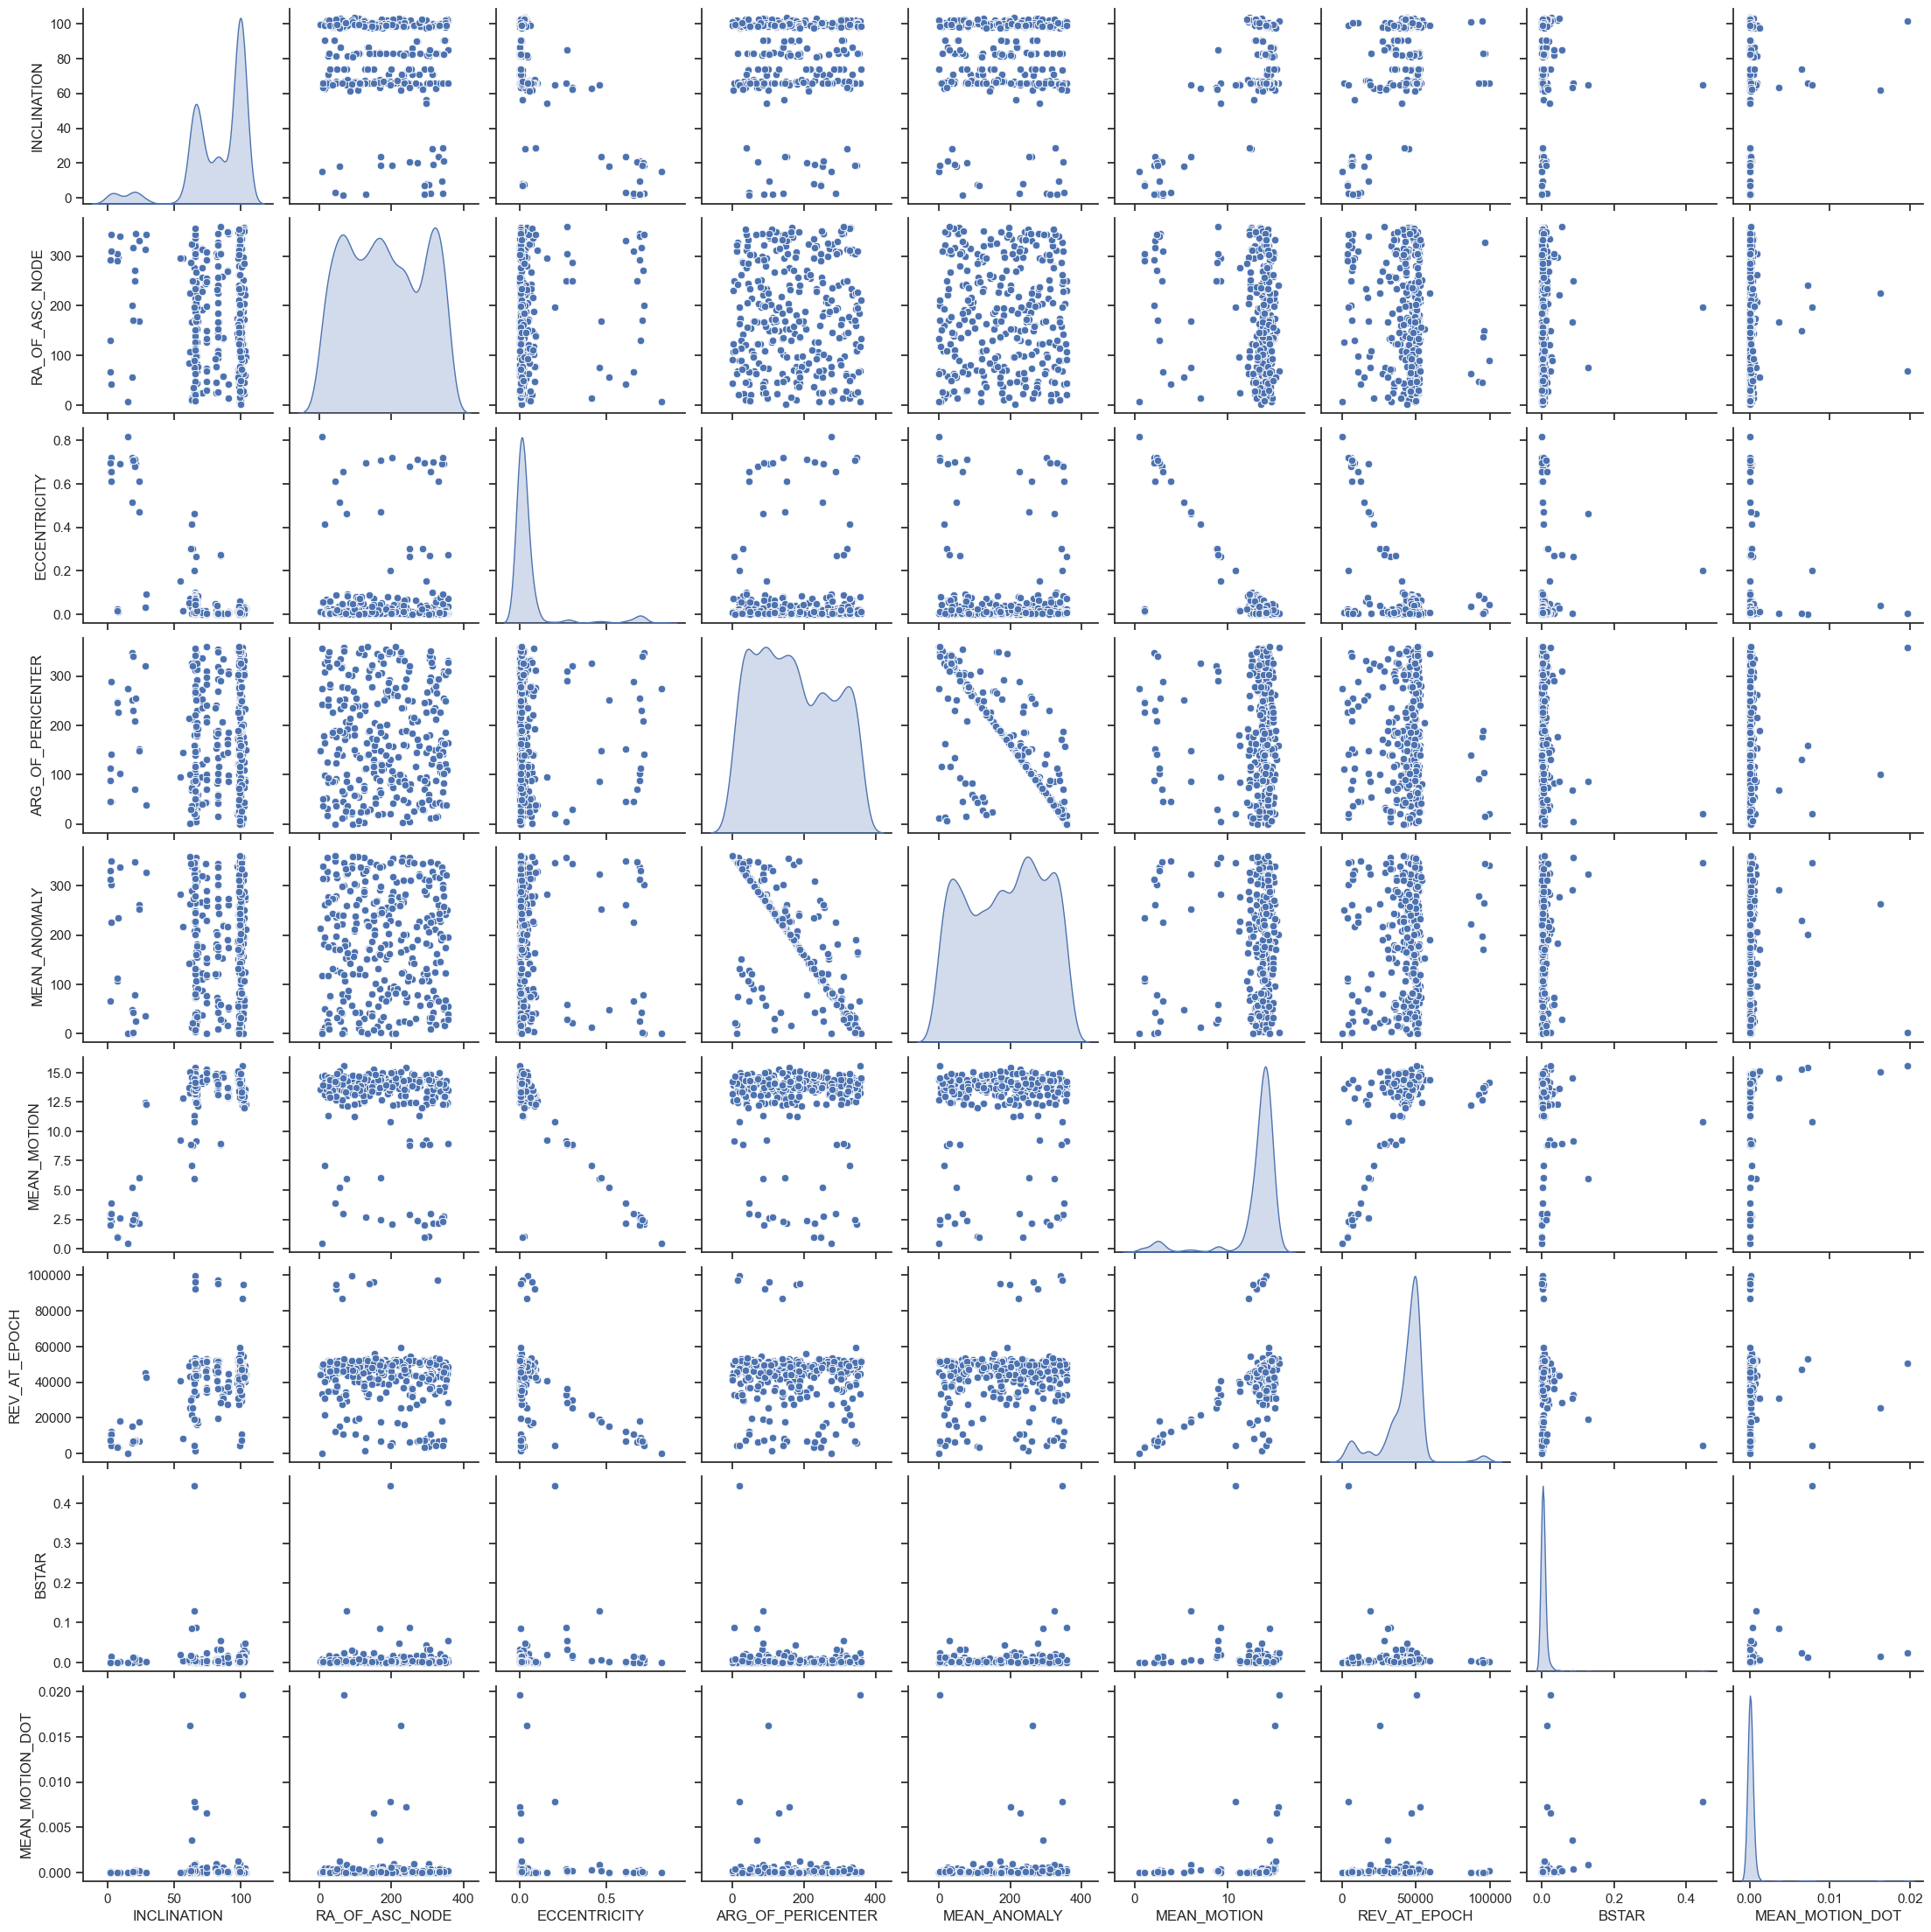

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a correlation plot
correlation_matrix = newdf.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

# Generate a pairplot including histograms and scatterplots
sns.set(style="ticks")
sns.pairplot(newdf, diag_kind="kde")
plt.show()


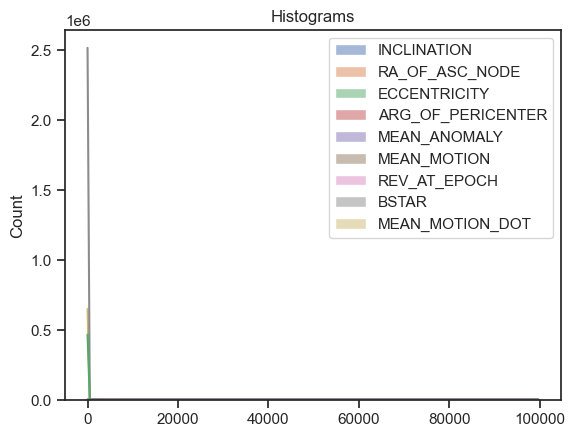

In [ ]:
# Histograms
sns.histplot(data=newdf, kde=True)
plt.title("Histograms")
plt.show()